# Muestreo y estandarización

### Importación de librerías necesarias

In [3]:
# Importar librerias necesarias
import numpy as np
import pandas as pd

import scipy as sp
import scipy.stats as st
import statsmodels.api as sm #generar modelos lineales generalizados modelos de regresion cuantitativas

import matplotlib.pyplot as plt

### Carga de datos

In [4]:
pwd

'C:\\Users\\Alexander\\Desktop\\Python'

In [10]:
# Importar datos en formato xls.
data_hipotecas = pd.read_excel('Data1/hipotecas.xlsx')

In [12]:
data_hipotecas.head(10)

,TIENDA,ID_VENDEDOR,NRO_HIPO
0,3,101,1
1,2,102,4
2,5,103,1
3,5,104,3
4,4,105,0
5,2,106,3
6,5,107,2
7,3,108,1
8,3,109,2
9,5,110,2


In [11]:
# hallazgos iniciales
print('dimensiones',data_hipotecas.shape)
print('Nro de tiendas:', len(np.unique(data_hipotecas.TIENDA)))
print('Nro de vendedores;', len(np.unique(data_hipotecas.ID_VENDEDOR)))

dimensiones (9798, 3)
Nro de tiendas: 5
Nro de vendedores; 9798


In [13]:
data_hipotecas.TIENDA.value_counts()

5    2003
3    1981
1    1975
4    1932
2    1907
Name: TIENDA, dtype: int64

In [14]:
data_hipotecas.groupby(['TIENDA']).size()

TIENDA
1    1975
2    1907
3    1981
4    1932
5    2003
dtype: int64

### Técnicas de selección de elementos por muestreo

<b>1.Muestreo aleatorio simple:</b>

De acuerdo con el principio de igual probabilidad, se seleccionan aleatoriamente n muestras de la población.<br>
Escenario aplicable: todos los individuos de la muestra son igualmente probables (uniformes).<br>
Según los escenarios aplicables, el muestreo aleatorio se divide en muestreo con reemplazo y muestreo sin reemplazo.

In [24]:
# Muestreo aleatorio simple por cantidad
print('Data completa=',data_hipotecas.shape) #shape extraem numeros al azar
print('Data MAS=',data_hipotecas.sample(n=50, replace=False).shape) #sample 50 datos al azar sin reeplazo

Data completa= (9798, 3)
Data MAS= (50, 3)


In [57]:
data_sample=data_hipotecas.sample(n=4500, replace=True) # TRUE ES CON REEMPLAZO

In [46]:
data_sample

,TIENDA,ID_VENDEDOR,NRO_HIPO
1122,1,1223,3
7334,3,7435,4
44,4,145,2
6478,4,6579,2
1965,4,2066,4
...,...,...,...
2822,3,2923,3
2752,3,2853,2
5100,5,5201,3
683,3,784,2


In [47]:
# Como verificar si un registro se repite
data_sample.duplicated()

1122    False
7334    False
44      False
6478    False
1965    False
        ...  
2822    False
2752     True
5100    False
683     False
964     False
Length: 4500, dtype: bool

In [59]:
data_sample.to_csv("muestra_reemplazo.csv")

In [63]:
data_sample.iloc[[2752],:]

,TIENDA,ID_VENDEDOR,NRO_HIPO
5129,1,5230,3


In [54]:
data_sample['TIENDA'].value_counts().sort_index()

1    906
2    876
3    943
4    904
5    871
Name: TIENDA, dtype: int64

In [22]:
data_sample['TIENDA'].value_counts(normalize = True).sort_index()

1    0.26
2    0.14
3    0.18
4    0.28
5    0.14
Name: TIENDA, dtype: float64

In [56]:
# Muestreo aleatorio simple por porcentaje
print('Data completa=',data_hipotecas.shape)
print('Data MAS=',data_hipotecas.sample(frac = 0.1, replace=False).shape)

Data completa= (9798, 3)
Data MAS= (980, 3)


In [49]:
data_sample_frac = data_hipotecas.sample(frac = 0.1, replace=False)

In [51]:
data_sample['TIENDA'].value_counts().sort_index()
    

1    906
2    876
3    943
4    904
5    871
Name: TIENDA, dtype: int64

In [52]:
data_sample['TIENDA'].value_counts(normalize = True).sort_index()

1    0.201333
2    0.194667
3    0.209556
4    0.200889
5    0.193556
Name: TIENDA, dtype: float64

### 2.Muestreo estratificado: (mas efectivo q el anterior , el muestreo sistematico es aún mejor)

Divida todas las muestras individuales en varias categorías de acuerdo con ciertas características y luego aplique un muestreo aleatorio o un muestreo equidistante de cada categoría para seleccionar individuos para formar una muestra.

Ventajas: Puede reducir significativamente los errores de muestreo y facilitar la investigación por separado para diferentes tipos de muestra de datos.

Escenarios aplicables: datos con características como atributos y etiquetados de lógica de clasificación.

In [78]:
# Muestreo Estratificado por cantidad
df_estrato = data_hipotecas.groupby('TIENDA', group_keys=False).apply(lambda x: x.sample(n = 200, replace = True)) # sample es extraer

In [79]:
df_estrato

,TIENDA,ID_VENDEDOR,NRO_HIPO
7269,1,7370,0
1994,1,2095,0
6264,1,6365,1
5161,1,5262,0
4990,1,5091,4
...,...,...,...
7468,5,7569,1
1547,5,1648,4
3005,5,3106,4
751,5,852,0


In [80]:
df_estrato['TIENDA'].value_counts().sort_index()


1    200
2    200
3    200
4    200
5    200
Name: TIENDA, dtype: int64

In [81]:
#Muestreo Estratificado por proporción
df_estrato2= data_hipotecas.groupby('TIENDA', group_keys=False).apply(lambda x: x.sample(frac = 0.1, replace = True))

In [82]:
df_estrato2['TIENDA'].value_counts().sort_index()

1    198
2    191
3    198
4    193
5    200
Name: TIENDA, dtype: int64

## Pruebas de Normalidad

In [85]:
# Importar datos en formato xls.
churners_data = pd.read_excel('Data1/Churners.xlsx')

In [86]:
churners_data.head()

,ID,EDAD,SEXO,CIVIL,HIJOS,INGRESO,AUTO,CHURN
0,0,57,Femenino,Casado,2,27535.3,Es dueño de un auto,Voluntario
1,4,68,Femenino,Casado,2,81000.9,No es dueño de un auto,Voluntario
2,8,34,Maculino,Soltero,0,87467.1,Es dueño de un auto,Actual
3,10,60,Masculino,Casado,2,83220.6,No es dueño de un auto,Voluntario
4,13,28,Femenino,Casado,2,20850.4,No es dueño de un auto,Voluntario


In [87]:
churners_data.groupby(['CHURN'])['ID'].count()

CHURN
Actual        656
Voluntario    688
Name: ID, dtype: int64

In [88]:
churners_data_vol=churners_data[churners_data['CHURN']=='Voluntario']

In [91]:
churners_data_vol.head()

,ID,EDAD,SEXO,CIVIL,HIJOS,INGRESO,AUTO,CHURN
0,0,57,Femenino,Casado,2,27535.300000,Es dueño de un auto,Voluntario
1,4,68,Femenino,Casado,2,81000.900000,No es dueño de un auto,Voluntario
3,10,60,Masculino,Casado,2,83220.600000,No es dueño de un auto,Voluntario
4,13,28,Femenino,Casado,2,20850.400000,No es dueño de un auto,Voluntario
5,18,60,Femenino,Casado,3,18665.449332,No es dueño de un auto,Voluntario


Seleccionamos la variable de interés:

In [90]:
churners_ing=churners_data_vol['INGRESO']

In [92]:
churners_ing.head()

0    27535.300000
1    81000.900000
3    83220.600000
4    20850.400000
5    18665.449332
Name: INGRESO, dtype: float64

### 1. Gráfico de Histograma

Un gráfico simple y de uso común para verificar rápidamente la distribución de una muestra de datos es el histograma. En el histograma, los datos se dividen en un número predeterminado de grupos llamados bins. Luego, los datos se clasifican en cada contenedor y se retiene el recuento del número de observaciones en cada contenedor.

El gráfico muestra los contenedores en el eje x manteniendo su relación ordinal, y el recuento en cada contenedor en el eje y. Una muestra de datos tiene una distribución gaussiana del diagrama del histograma, que muestra la forma familiar de campana.

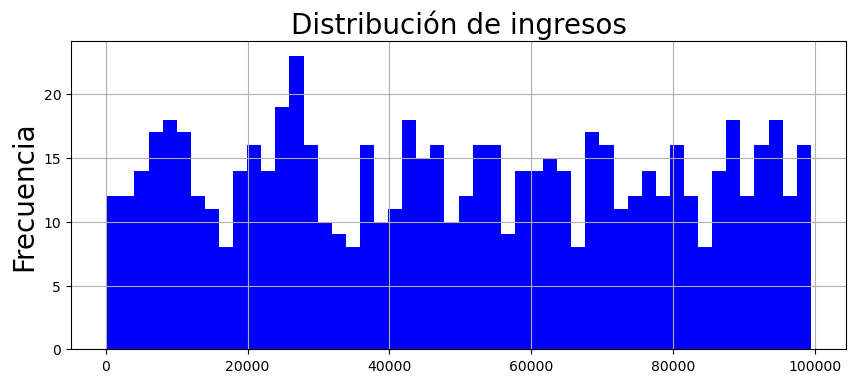

In [94]:
# Análisis gráfico
fig = plt.figure(figsize=(10,4))
plt.hist(churners_ing,bins=50,color='blue')
plt.title('Distribución de ingresos',fontsize=20)
plt.ylabel('Frecuencia',fontsize=20)

plt.grid()
plt.show()

In [95]:
churners_ing.describe()

count      688.000000
mean     49623.108863
std      29060.115998
min         45.166373
25%      24920.998368
50%      49394.212261
75%      74890.123593
max      99460.263056
Name: INGRESO, dtype: float64

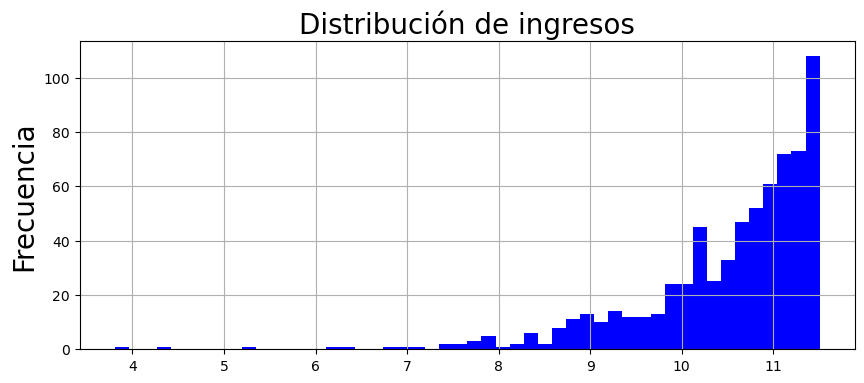

In [96]:
# Análisis gráfico
fig = plt.figure(figsize=(10,4))
plt.hist(np.log(churners_ing),bins=50,color='blue')
plt.title('Distribución de ingresos',fontsize=20)
plt.ylabel('Frecuencia',fontsize=20)

plt.grid()
plt.show()

In [97]:
np.log(churners_ing).describe()

count    688.000000
mean      10.502883
std        1.003745
min        3.810353
25%       10.123464
50%       10.807584
75%       11.223777
max       11.507513
Name: INGRESO, dtype: float64

### 2. Gráfico de cuantiles-cuantiles

Otro gráfico popular para verificar la distribución de una muestra de datos es el gráfico de cuantiles-cuantiles, gráfico QQ o gráfico QQ para abreviar, Esta gráfica genera su propia muestra de la distribución idealizada con que estamos comparando, en este caso la distribución gaussiana. Las muestras idealizadas se dividen en grupos (por ejemplo 5), llamado cuantiles. Cada punto de datos de la muestra se empareja con un miembro similar de la distribución idealizada en la misma distribución acumulativa.

Los puntos resultantes se trazan como un diagrama de dispersión con el valor idealizado en el eje xy la muestra de datos del eje y. Una linea de puntos en un ángulo de 45 grados desde la parte inferior izquierda del gráfico hasta la parte superior derecha mostrará una coincidencia perfecta para la distribución. A menudo, se traza una línea en la trama para ayudar a aclarar esta expectativa. Las desviaciones de los puntos de la línea muestran una desviación de la distribución esperada.

In [124]:
sm.qqplot(churners_ing, dist="norm")
plt.show()

AttributeError: 'str' object has no attribute 'name'

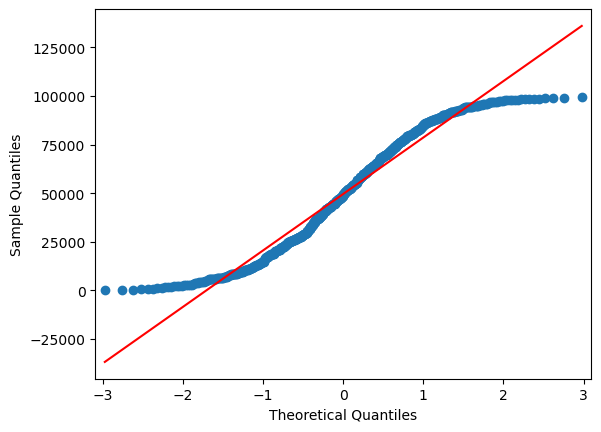

In [106]:
sm.qqplot(churners_ing, line='s')
plt.show()

## Pruebas de normalidad estadística

Hay muchas pruebas estadísticas que podemos utilizar para cuantificar si una muestra de datos parece extraída de una distribución gaussiana. Cada prueba hace diferentes suposiciones y considera diferentes aspectos de los datos.

En esta sección, analizamos 3 pruebas de uso común que puede aplicar a sus propias muestras de datos.

Interpretación de una prueba Cada prueba devolverá al menos dos cosas:

  * <b>Estadística:</b> una cantidad calculada por la prueba que se puede interpretar en el contexto de la prueba comparándola con los valores criticos de la distribución de la estadística de prueba.
  * <b>valor p:</b> se utiliza para interpretar la prueba, en este caso si la muestra se extrajo de una distribución gaussiana. Las pruebas suponen que la muestra se extrajo de una distribución gaussiana. Tecnicamente, esto se llama hipótesis nula o HO. Se elige un nivel de umbral llamado alfa, típicamente 5% ( o 0.05), que se usa para interpretar el valor p.
  
En la implementación de SciPy de estas pruebas, puede interpretar el valor p de la siguiente manera.

  * p <= alpha : rechaza HO, no es normal.
  * p>alpha: falla el rechazar HO, normal.

Un resultado superior al 5% no significa que la hipótesis nula sea cierta. Significa que es muy probable que sea cierto dada la evidencia disponible. El valor p no es la probabilidad de que los datos se ajusten a una distribución gaussiana; se puede considerar como un valor que nos ayude a interpretar la prueba estadística.

### 3. Pueba de Shapiro-Wilk

La prueba de Shapiro-Wilk evalúa una muestra de datos y cuantifica la probabilidad de que los datos se extraigan de una distribución gaussiana, llamada así por Samuel Shapiro y Martin Wilk.

En la práctica, se cree que la prueba de Shapiro.Wilk es una prueba confiable de normalidad, aunque se sugiere que la prueba puede ser adecuada para muestras de datos más pequeñas, por ejemplo, miles de observaciones o menos.

La función Shapiro() SciPY calculará el Shapiro.Wilk en un conjunto de datos dado. La función devuelve tanto el estadístico W calculado por la prueba como el valor p.

In [127]:
# Prueba de hipotesis (no parametrica)
# Ho: La variable se distribuye de manera normal 
# Ha: La varible no se distribuye de manera normal
# alpha = 0.05
# Ho se rechaza cuando el Pvalor < 0.05

# A un nivel de significación del 5%, podemos concluir que los ingresos no tienen una distribución normal

In [126]:
shapiro_test = st.shapiro(churners_ing)
shapiro_test

ShapiroResult(statistic=0.951218843460083, pvalue=2.6495453170328163e-14)

In [109]:
print('estadístico:',round(shapiro_test[0],3))
print('p_value:',round(shapiro_test[1],3))

estadístico: 0.951
p_value: 0.0


In [115]:
# normality test
stat, p = st.shapiro(churners_ing)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.951, p=0.000
Sample does not look Gaussian (reject H0)


### 4. Prueba de Anderson-Darling

La prueba de Anderson-Darling es una prueba esdística que se puede utilizar para evaluar si una muestra de datos proviene de una de las muchas muestras de datos conocidas, que lleva el nombre de Theodore Anderson y Donald Darling.

Se puede utilizar para comprobar si una muestra de datos es normal. La prueba es una versión modificada de una prueba estadística de bondad de ajuste no paramétrica más sofisticada llamada prueba de Kolmogorov-Smirnov.

Una característica de la prueba de Anderson-Darling es que devuelve una lista de valores críticos en lugar de un solo valor p. Esto puede proporcionar la base para una interpretación más completa del resultado.

La función anderson de SciPy implementa la prueba Anderson-Darling. Toma como parámetros la muestra de datos y el nombre de la distribución para probarla. De forma predeterminada, la prueba se comparará con la distribución gaussiana.

In [122]:
# Anderson-Darling Test
from scipy.stats import anderson

# normality test
result = anderson(churners_ing)
print('Statistic: %.3f' % result.statistic)
p = 0 

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl,cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 8.410
15.000: 0.573, data does not look normal (reject H0)
10.000: 0.652, data does not look normal (reject H0)
5.000: 0.782, data does not look normal (reject H0)
2.500: 0.913, data does not look normal (reject H0)
1.000: 1.086, data does not look normal (reject H0)


In [123]:
anderson(churners_ing)

AndersonResult(statistic=8.410026112434593, critical_values=array([0.573, 0.652, 0.782, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=49623.10886311619, scale=29060.115998345667)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Podemos interpretar los resultados si no rechazamos la hipótesis nula de que los datos son normales si el estadístico de prueba calculado es menor que el valor crítico en un nivel de significancia elegido.

Podemos ve que en cada nivel de significancia, la prueba ha encontrado que los datos no siguen una distribución normal:

## Proceso de estandarización de datos

La estandarización de datos es un paso muy importante en el prefactor de datos. En aplicaciones prácticas, a menudo nos encontramos con un conjunto de datos que contiene una variedad de características, a menudo con diferentes distribuciones e intervalos, con diferentes niveles(dimensión), que es fácil de afectar nuestra capacitación modelo. La estandarización de datos es eliminar los efectos de la escala, la características y las diferencias de distribución en el modelo.

Además, después de que toda la funciónm esté estandarizada, podemos hacer carteras ponderadas para generar nuevos indicadores, y los datos en bruto a menudo no admiten que ponderemos directamente.

### 1.Estandarización z

La estandarización de la puntuación Z se estandariza en función de la normalización de la media y la desviación estándar de los datos originales, y su fórmula de transformación es:

<b>normalización = (x - media) / desviación típica </b>

Este método es adecuado para la mayoría de los tipos de datos, que es muy amplio. Desde la fórmula, podemos ver que la media se convertirá en 0 después de la transformación, y la variación y la diferencia estándar se convertirán en 1 (considerada la fórmula de la varianza), esta parte si no entiende, es posible que desee razonarlo.

In [128]:
# estandarización de datos
score_churners = st.zscore(churners_ing) # estandarizamos los datos

In [129]:
score_churners

0      -0.760626
1       1.080540
3       1.156979
4      -0.990830
5      -1.066072
          ...   
1338   -1.689660
1339    1.458631
1340   -1.652568
1341    0.621944
1343    1.553032
Name: INGRESO, Length: 688, dtype: float64

### 2.Escalamiento MIN-MAX

El método de estandarización MIN-MAX transformará linealmente los datos originales, y su fórmula de conversión es:
 
<b>escalamiento = (x - xmin)/(xmax - xmin)</b> 

Obviamente, cuando X es el valor máximo, se convertirá a 1; cuando X es un valor mínimo, el nuevo valor correspondiente es 0; El conjunto completo de datos se distribuye dentro del intervalo de 0 a 1, y la distribución de datos. y no cambiará.

In [1]:
# escalado de datos 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_churners = scaler.fit_transform(np.reshape(np.array(churners_ing),(-1,1)))

NameError: name 'np' is not defined

In [ ]:
scaler_churners.max()

In [135]:
# Comparando resultados de variables generadas
a = pd.DataFrame(np.array(churners_ing))
b = pd.DataFrame(score_churners)
c = pd.DataFrame(scaler_churners)

variable = pd.concat([a,b,c],axis = 1)
variable.columns = ['churners_ing','score_churners','scaler_churners']
variable.head()

,churners_ing,score_churners,scaler_churners
0,27535.300000,-0.760626,0.276519
1,81000.900000,1.080540,0.814320
2,83220.600000,NaN,0.836648
3,20850.400000,1.156979,0.209276
4,18665.449332,-0.990830,0.187298


In [140]:
variable.describe()

,churners_ing,score_churners,scaler_churners
count,688.000000,6.880000e+02,688.000000
mean,49623.108863,1.136042e-16,0.498696
std,29060.115998,1.000728e+00,0.292311
min,45.166373,-1.707289e+00,0.000000
25%,24920.998368,-8.506533e-01,0.250222
50%,49394.212261,-7.882389e-03,0.496394
75%,74890.123593,8.701066e-01,0.752853
max,99460.263056,1.716215e+00,1.000000


In [141]:
print('churners promedio:',round(variable.churners_ing.mean(),2))
print('churners varianza:',round(variable.churners_ing.std(),4))

print('score promedio:',round(variable.score_churners.mean(),2))
print('score varianza:',round(variable.score_churners.std(),4))

print('escaler promedio:',round(variable.scaler_churners.mean(),2))
print('escaler varianza:',round(variable.scaler_churners.std(),4))

churners promedio: 49623.11
churners varianza: 29060.116
score promedio: 0.0
score varianza: 1.0007
escaler promedio: 0.5
escaler varianza: 0.2923
